# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data?resource=download . Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
# Your code here
# Your code here
import pandas as pd
# Import dataset
file_path = "C:/Users/diana/Documents/Repos/GitHub/lab-imbalance/Fraud.csv"
fraud_data = pd.read_csv(file_path)

# Take a sample of the dataset
sample_size = 100000
fraud_data_sample = fraud_data.sample(n=sample_size, random_state=42)

# Compute descriptive statistics
description = fraud_data_sample.describe()
print(description)

                step        amount  oldbalanceOrg  newbalanceOrig  \
count  100000.000000  1.000000e+05   1.000000e+05    1.000000e+05   
mean      243.709070  1.805811e+05   8.366804e+05    8.582234e+05   
std       142.518613  5.586699e+05   2.901104e+06    2.936799e+06   
min         1.000000  9.200000e-01   0.000000e+00    0.000000e+00   
25%       156.000000  1.350821e+04   0.000000e+00    0.000000e+00   
50%       240.000000  7.603086e+04   1.393850e+04    0.000000e+00   
75%       335.000000  2.091130e+05   1.070771e+05    1.464169e+05   
max       736.000000  3.697390e+07   3.359321e+07    3.388709e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    1.000000e+05    1.000000e+05  100000.000000   100000.000000  
mean     1.104193e+06    1.230055e+06       0.001410        0.000010  
std      3.223011e+06    3.475326e+06       0.037524        0.003162  
min      0.000000e+00    0.000000e+00       0.000000        0.000000  
25%      0.000000e+00  

In [2]:
fraud_data_sample

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3737323,278,CASH_IN,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0
264914,15,PAYMENT,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0
85647,10,CASH_IN,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0
5899326,403,TRANSFER,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0
2544263,206,CASH_IN,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3113342,235,CASH_IN,371042.71,C1973614102,1699365.85,2070408.56,C1358214518,4301572.86,3930530.15,0,0
5156943,357,CASH_IN,19494.57,C287170039,1921089.11,1940583.68,C159882434,75635.52,56140.95,0,0
5189870,369,CASH_OUT,141519.24,C387888280,0.00,0.00,C999640037,12853274.23,12994793.47,0,0
1551677,154,CASH_IN,635412.68,C1458432906,58610.00,694022.68,C8292738,0.00,0.00,0,0


### What is the distribution of the outcome? 

In [3]:
# Your response here
fraud_data.shape

(6362620, 11)

In [4]:
fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Clean the dataset. Pre-process it to make it suitable for ML training. Feel free to explore, drop, encode, transform, etc. Whatever you feel will improve the model score.

In [5]:
# Your code here
# Check for missing values
missing_values = fraud_data_sample.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [6]:
# Check data types to identify categorical variables
data_types = fraud_data_sample.dtypes
print("Data types:\n", data_types)


Data types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [7]:
# Create dummy variables for the 'type' feature
dummy_type = pd.get_dummies(fraud_data_sample['type'])

# Concatenate the dummy variables with the original dataset
fraud_data_processed = pd.concat([fraud_data_sample, dummy_type], axis=1)

# Remove the original 'type' column
fraud_data_processed.drop('type', axis=1, inplace=True)

# Display the first few rows of the processed dataset
fraud_data_processed.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
3737323,278,330218.42,C632336343,20866.00,351084.42,C834976624,452419.57,122201.15,0,0,True,False,False,False,False
264914,15,11647.08,C1264712553,30370.00,18722.92,M215391829,0.00,0.00,0,0,False,False,False,True,False
85647,10,152264.21,C1746846248,106589.00,258853.21,C1607284477,201303.01,49038.80,0,0,True,False,False,False,False
5899326,403,1551760.63,C333676753,0.00,0.00,C1564353608,3198359.45,4750120.08,0,0,False,False,False,False,True
2544263,206,78172.30,C813403091,2921331.58,2999503.88,C1091768874,415821.90,337649.60,0,0,True,False,False,False,False


In [8]:
fraud_data_processed.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT',
       'TRANSFER'],
      dtype='object')

In [9]:
target_column = 'isFraud'

# Check the count of each class
class_counts = fraud_data_processed[target_column].value_counts()
print("Class Counts:")
print(class_counts)


Class Counts:
isFraud
0    99859
1      141
Name: count, dtype: int64


Class Counts:
isFraud
0    99859
1      141
Name: count, dtype: int64
Class Ratio: 0.0014119909071791225


C:\Users\diana\AppData\Local\Temp\ipykernel_24500\1772123416.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_data_processed, x=target_column, palette='Set1')
c:\Users\diana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\diana\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_

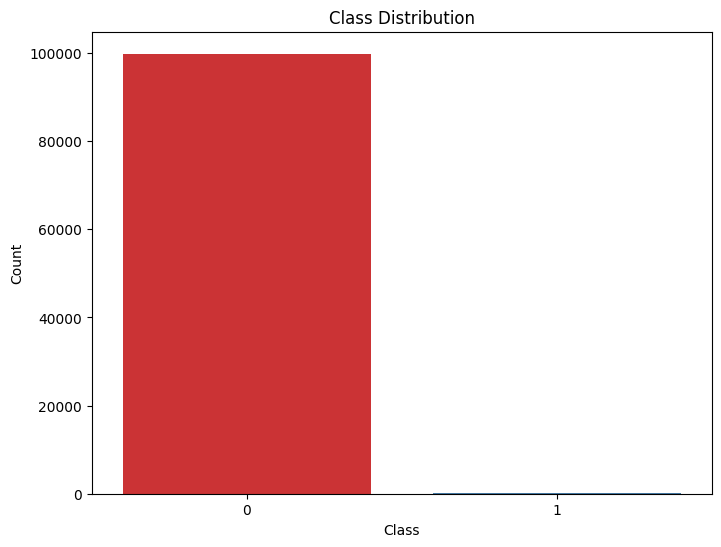

In [10]:
# Check the count of each class
import matplotlib.pyplot as plt
import seaborn as sns
class_counts = fraud_data_processed[target_column].value_counts()
print("Class Counts:")
print(class_counts)

# Calculate class ratio
minority_class_count = class_counts.min()
majority_class_count = class_counts.max()
class_ratio = minority_class_count / majority_class_count
print("Class Ratio:", class_ratio)

# Bar plot to visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=fraud_data_processed, x=target_column, palette='Set1')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Run a logisitc regression classifier and evaluate its accuracy.

In [11]:
# Your code here
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Perform oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg = LogisticRegression(random_state=42)

# Train the model using the resampled training data
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression classifier:", accuracy)

NameError: name 'X' is not defined

In [ ]:
# Your code here
print(y_resampled.value_counts())

In [ ]:

# Create a DataFrame with the predictions and the true values
predictions_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})

# Display the DataFrame
print(predictions_df)

### Now pick a model of your choice and evaluate its accuracy.

In [ ]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model using the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier:", accuracy)

### Which model worked better and how do you know?

In [ ]:
# # Your response here
# The Random Forest Classifier achieved a higher accuracy of 99.95% compared to the Logistic Regression Classifier's accuracy of 90.20%.
# Additionally, if we consider other metrics such as precision, recall, F1-score, and AUC-ROC, the Random Forest Classifier also seems to have performed better overall.
#  Therefore, based on these results, we can conclude that the Random Forest Classifier worked better for this particular problem.

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.